In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from neural_network_improved import NeuralNetwork

Datei mit Bildern laden:

In [2]:
df = pd.read_csv("digits.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Label von Bilddaten trennen:

In [3]:
y = df.iloc[:,-1].to_numpy()  # Extrahiert die letzte Spalte des DataFrames als NumPy-Array (Zielvariable/Labels)
X = df.iloc[:,:-1].to_numpy()  # Extrahiert alle Spalten außer der letzten als NumPy-Array (Eingabedaten/Merkmale)

X.shape, y.shape  # Gibt die Dimensionen von X (Feature-Matrix) und y (Zielvariable) zurück


((1797, 64), (1797,))

Funktion zur Ausgabe eines Bilds:

In [4]:
def show_images(X_rows, img_size=(8, 8), cols=5, scale=1, true_labels=None, pred_labels=None):
    """
    Zeigt ein oder mehrere Bilder mit optionalen True- und Pred-Labels an.

    Parameter:
    - X_rows: Eine einzelne Zeile oder mehrere Zeilen mit Pixelwerten.
    - img_size: Tuple (Höhe, Breite) der Bilder. Standard: (8, 8).
    - cols: Anzahl der Spalten in der Anzeige, falls mehrere Bilder dargestellt werden.
    - scale: Skaliert die Größe der gesamten Figure. Standard: 1.0 (unverändert).
    - true_labels: (Optional) Liste oder NumPy-Array mit wahren Labels.
    - pred_labels: (Optional) Liste oder NumPy-Array mit vorhergesagten Labels.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Falls nur eine Zeile gegeben ist, in eine Liste umwandeln
    if len(np.shape(X_rows)) == 1:
        X_rows = [X_rows]

    num_images = len(X_rows)
    rows = (num_images // cols) + int(num_images % cols > 0)  # Berechnung der Zeilenanzahl

    # Kleinere Bilder durch Multiplikation mit `scale`
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.5 * scale, rows * 1.5 * scale))
    axes = np.array(axes).reshape(-1)  # Falls nur eine Zeile, Umwandlung in 1D-Array

    for i, (ax, img) in enumerate(zip(axes, X_rows)):
        img_array = np.array(img).reshape(img_size)  # Zeile in Bild umwandeln
        ax.imshow(img_array, cmap='gray')  # Bild anzeigen
        ax.axis("off")  # Achsen ausblenden

        # Falls Labels angegeben sind, aber numerisch → In String konvertieren
        true_label = str(true_labels[i]) if (true_labels is not None and i < len(true_labels)) else None
        pred_label = str(pred_labels[i]) if (pred_labels is not None and i < len(pred_labels)) else None

        # Titel-Format "true: X pred: Y", aber flexibel
        title = ""
        if true_label is not None:
            title += f"True: {true_label} "
        if pred_label is not None:
            title += f"Pred: {pred_label}"

        if title:
            ax.set_title(title.strip(), fontsize=8 * scale)  # Schriftgröße skalieren

    # Falls mehr Subplots als Bilder vorhanden sind, leere Plots verstecken
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.show()

Die ersten 10 Bilder ausgeben:

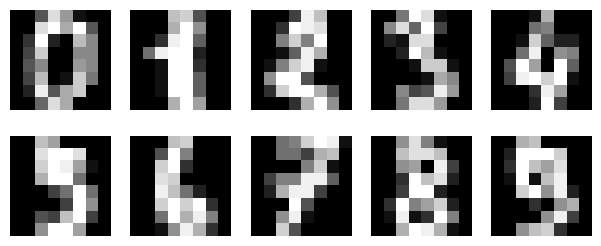

In [5]:
show_images(X[:10])

In [ ]:
model = NeuralNetwork(4, 10, 3, learning_rate=0.0005, epochs=200, activation="tanh", random_state=42)

In [7]:
model = NeuralNetwork(64, 256, 10, learning_rate = 0.0005, epochs=200, activation="tanh", random_state=42)
X_test, y_test, X_train, y_train = model.prepare(X, y, test_ratio = 0.1)

In [9]:
model.fit(X_test, y_test)

Epoch 0: Fortschritt 1617/1617
Epoch 1: Fortschritt 1617/1617
Epoch 2: Fortschritt 1617/1617
Epoch 3: Fortschritt 1617/1617
Epoch 4: Fortschritt 1617/1617
Epoch 5: Fortschritt 1617/1617
Epoch 6: Fortschritt 1617/1617
Epoch 7: Fortschritt 1617/1617
Epoch 8: Fortschritt 1617/1617
Epoch 9: Fortschritt 1617/1617
Epoch 10: Fortschritt 1617/1617
Epoch 11: Fortschritt 1617/1617
Epoch 12: Fortschritt 1617/1617
Epoch 13: Fortschritt 1617/1617
Epoch 14: Fortschritt 1617/1617
Epoch 15: Fortschritt 1617/1617
Epoch 16: Fortschritt 1617/1617
Epoch 17: Fortschritt 1617/1617
Epoch 18: Fortschritt 1617/1617
Epoch 19: Fortschritt 1617/1617
Epoch 20: Fortschritt 1617/1617
Epoch 21: Fortschritt 1617/1617
Epoch 22: Fortschritt 1617/1617
Epoch 23: Fortschritt 1617/1617
Epoch 24: Fortschritt 1617/1617
Epoch 25: Fortschritt 1617/1617
Epoch 26: Fortschritt 1617/1617
Epoch 27: Fortschritt 1617/1617
Epoch 28: Fortschritt 1617/1617
Epoch 29: Fortschritt 1617/1617
Epoch 30: Fortschritt 1617/1617
Epoch 31: Fortschr

KeyboardInterrupt: 

In [11]:
correct, percent, y_pred = model.predict(X_test, targets = y_test)
print(f"{correct} korrekte Vorhersagen ({percent}%).")

1604 korrekte Vorhersagen (99.19604205318491%).


In [35]:
model.get_params()

{'input_neurons': 64,
 'hidden_neurons': 256,
 'output_neurons': 10,
 'learning_rate': 0.0005,
 'epochs': 2000,
 'categories': [np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(7),
  np.int64(8),
  np.int64(9)],
 'random_state': 42,
 'verbose': True}

In [20]:
y_true = np.argmax(y_test, axis=1)

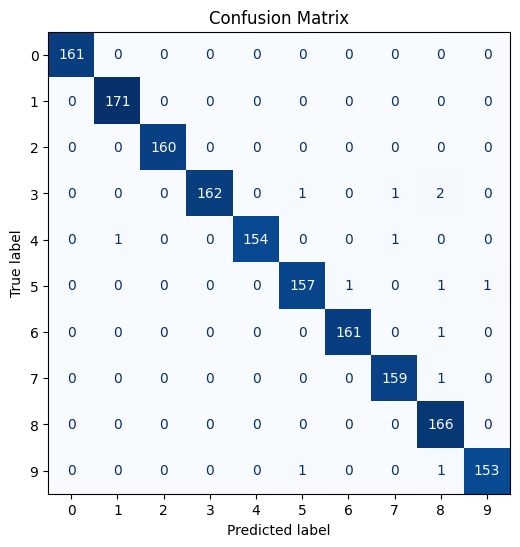

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       0.99      1.00      1.00       171
           2       1.00      1.00      1.00       160
           3       1.00      0.98      0.99       166
           4       1.00      0.99      0.99       156
           5       0.99      0.98      0.98       160
           6       0.99      0.99      0.99       162
           7       0.99      0.99      0.99       160
           8       0.97      1.00      0.98       166
           9       0.99      0.99      0.99       155

    accuracy                           0.99      1617
   macro avg       0.99      0.99      0.99      1617
weighted avg       0.99      0.99      0.99      1617



In [21]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) #, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

# Classification Report ausgeben
print("Classification Report:")
print(classification_report(y_true, y_pred)) #, target_names=class_labels))

Falsch klassifizierte Biler anzeigen:

In [32]:
wrong_pred_indices = np.where(y_pred != y_true)[0]
wrong_pred_indices

array([ 159,  251,  336,  418,  556,  614,  647,  770,  806,  821,  941,
       1225, 1502])

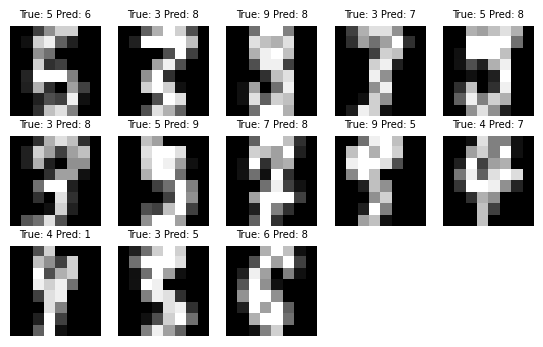

In [40]:
show_images([X_test[i] for i in wrong_pred_indices],
            true_labels=[y_true[j] for j in wrong_pred_indices], 
            pred_labels=[y_pred[k] for k in wrong_pred_indices],
            scale=.9)